# House price prediction model

In [353]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Ridge  
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as rs
from sklearn.metrics import mean_absolute_error as mae
import xgboost
import os
mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-7.2.0-posix-seh-rt_v5-rev0\\mingw64\\bin'
os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']
from xgboost import XGBRegressor
from sklearn.externals import joblib

## Import Data

In [354]:
data = pd.read_csv('Melbourne_housing_FULL.csv')
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


## Exploring data

In [355]:
data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [356]:
data.shape

(34857, 21)

In [357]:
#checking null values
data.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

## Exploring each column

### Suburb

In [358]:
data['Suburb'].unique()

array(['Abbotsford', 'Airport West', 'Albert Park', 'Alphington',
       'Altona', 'Altona North', 'Armadale', 'Ascot Vale', 'Ashburton',
       'Ashwood', 'Avondale Heights', 'Balaclava', 'Balwyn',
       'Balwyn North', 'Bentleigh', 'Bentleigh East', 'Box Hill',
       'Braybrook', 'Brighton', 'Brighton East', 'Brunswick',
       'Brunswick West', 'Bulleen', 'Burwood', 'Camberwell', 'Canterbury',
       'Carlton North', 'Carnegie', 'Caulfield', 'Caulfield North',
       'Caulfield South', 'Chadstone', 'Clifton Hill', 'Coburg',
       'Coburg North', 'Collingwood', 'Doncaster', 'Eaglemont',
       'Elsternwick', 'Elwood', 'Essendon', 'Essendon North', 'Fairfield',
       'Fitzroy', 'Fitzroy North', 'Flemington', 'Footscray', 'Glen Iris',
       'Glenroy', 'Gowanbrae', 'Hadfield', 'Hampton', 'Hampton East',
       'Hawthorn', 'Heidelberg Heights', 'Heidelberg West', 'Hughesdale',
       'Ivanhoe', 'Kealba', 'Keilor East', 'Kensington', 'Kew',
       'Kew East', 'Kooyong', 'Maidstone', 

#### Location lattitude and longitude 

<Figure size 720x720 with 0 Axes>

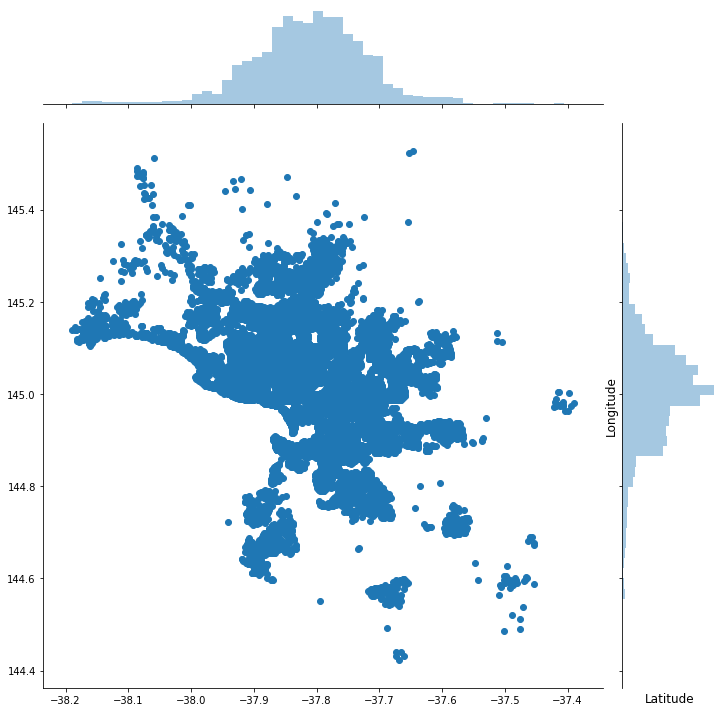

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [359]:
plt.figure(figsize=(10,10))
sns.jointplot(x=data.Lattitude.values, y=data.Longtitude.values, size=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()
sns.despine

### Rooms

In [360]:
data['Rooms'].unique()

array([ 2,  3,  4,  1,  5,  6,  7,  8, 10,  9, 12, 16], dtype=int64)

In [361]:
data['Rooms'].describe()

count    34857.000000
mean         3.031012
std          0.969933
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         16.000000
Name: Rooms, dtype: float64

#### Exploring room outliers

##### Plotting

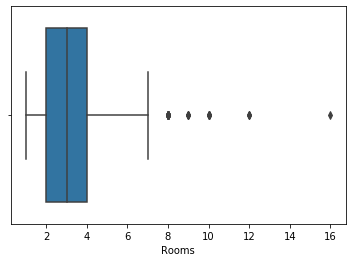

In [362]:
sns.boxplot(data=data, x=data['Rooms'])

In [363]:
#there are outliers that needs to be removed, exploring them below
data[data['Rooms'] >= 6]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
81,Airport West,11 Harrington Rd,6,h,725000.0,SP,Barry,7/05/2016,13.5,3042.0,...,3.0,2.0,976.0,186.0,1980.0,Moonee Valley City Council,-37.72390,144.87350,Western Metropolitan,3464.0
175,Albert Park,143 Kerferd Rd,7,h,NaN,SN,hockingstuart,24/09/2016,3.3,3206.0,...,7.0,0.0,435.0,NaN,NaN,Port Phillip City Council,-37.84730,144.95390,Southern Metropolitan,3280.0
426,Armadale,367 Dandenong Rd,6,h,5525000.0,S,Marshall,17/09/2016,6.3,3143.0,...,3.0,4.0,1491.0,516.0,1935.0,Stonnington City Council,-37.86020,145.01300,Southern Metropolitan,4836.0
496,Ascot Vale,75 Maribyrnong Rd,6,h,2425000.0,PI,Brad,4/06/2016,5.9,3032.0,...,3.0,2.0,1014.0,435.0,1887.0,Moonee Valley City Council,-37.77210,144.91840,Western Metropolitan,6567.0
538,Ascot Vale,26 Ayr St,6,h,1430000.0,S,Nelson,16/04/2016,5.9,3032.0,...,2.0,1.0,461.0,286.0,1900.0,Moonee Valley City Council,-37.78000,144.92950,Western Metropolitan,6567.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34212,Endeavour Hills,10 Barnsley Dr,6,h,1070000.0,S,One,24/02/2018,28.5,3802.0,...,3.0,2.0,800.0,326.0,1997.0,Casey City Council,-37.97776,145.27613,South-Eastern Metropolitan,8443.0
34367,Hillside,10 Castlewellan Bvd,6,h,950000.0,PI,Barry,24/02/2018,18.0,3037.0,...,3.0,3.0,2000.0,290.0,1995.0,Brimbank City Council,-37.69332,144.73050,Western Metropolitan,5556.0
34412,Kew,118 Walpole St,6,h,2905000.0,SP,Marshall,24/02/2018,5.4,3101.0,...,3.0,2.0,855.0,294.0,1920.0,Boroondara City Council,-37.79626,145.03362,Southern Metropolitan,10331.0
34494,Middle Park,33 Canterbury Rd,6,h,5575000.0,S,Marshall,24/02/2018,3.0,3206.0,...,4.0,4.0,420.0,324.0,1880.0,Port Phillip City Council,-37.84535,144.96044,Southern Metropolitan,2019.0


In [364]:
#there are 123 rows with rooms greater than or equal to 6, which is a small percentage, hence removing them
data = data[data['Rooms'] < 6]

#### Exploring bathroom outliers

In [365]:
data['Bathroom'].describe()

count    26400.000000
mean         1.611705
std          0.704614
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max         12.000000
Name: Bathroom, dtype: float64

##### Plotting

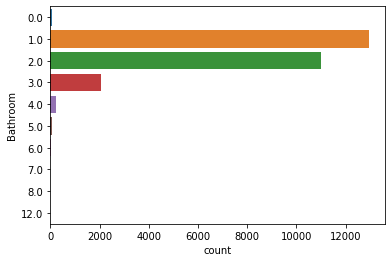

In [366]:
sns.countplot(y='Bathroom', data = data)

In [367]:
data[data['Bathroom']>=5]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
642,Ashburton,29A Yuile St,5,h,3510000.0,S,Jellis,18/03/2017,11.0,3147.0,...,5.0,2.0,755.0,444.0,2015.0,Boroondara City Council,-37.85980,145.07960,Southern Metropolitan,3052.0
756,Avondale Heights,6 Lovett Dr,4,h,1200000.0,S,Nelson,4/06/2016,10.5,3034.0,...,5.0,4.0,673.0,NaN,NaN,Moonee Valley City Council,-37.75450,144.87360,Western Metropolitan,4502.0
856,Balwyn,4 Melba Ct,5,h,3250000.0,PI,hockingstuart,3/12/2016,9.7,3103.0,...,5.0,2.0,651.0,410.0,NaN,Boroondara City Council,-37.80710,145.09080,Southern Metropolitan,5682.0
945,Balwyn,2 Birtles Ct,5,h,3000000.0,VB,Jellis,18/06/2016,9.7,3103.0,...,5.0,2.0,671.0,NaN,NaN,Boroondara City Council,-37.80250,145.06650,Southern Metropolitan,5682.0
947,Balwyn,49 Metung St,5,h,3400000.0,VB,Jellis,18/06/2016,9.7,3103.0,...,6.0,4.0,739.0,502.0,NaN,Boroondara City Council,-37.80390,145.07140,Southern Metropolitan,5682.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33370,Glen Waverley,323 Gallaghers Rd,5,h,2500000.0,PI,Barry,17/03/2018,16.7,3150.0,...,5.0,2.0,1042.0,NaN,NaN,Monash City Council,-37.88811,145.17640,Eastern Metropolitan,15321.0
33780,Strathmore,18 Glenview Rd,5,h,3300000.0,S,Nelson,17/03/2018,8.2,3041.0,...,5.0,2.0,1076.0,397.0,2015.0,Moonee Valley City Council,-37.73896,144.92131,Western Metropolitan,3284.0
33942,Ashwood,13 Maroondah Rd,5,h,1975000.0,S,Buxton/Marshall,24/02/2018,10.2,3147.0,...,5.0,2.0,725.0,NaN,NaN,Monash City Council,-37.86486,145.11130,Southern Metropolitan,2894.0
33960,Balwyn,110 Gordon St,5,h,4350000.0,VB,Marshall,24/02/2018,7.9,3103.0,...,5.0,2.0,641.0,NaN,NaN,Boroondara City Council,-37.80862,145.07452,Southern Metropolitan,5682.0


In [368]:
bath_vs_room_outlier = data[data['Bathroom']>data['Rooms']+1]
bath_vs_room_outlier

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1004,Balwyn,29 Sevenoaks St,5,h,3900000.0,PI,Jellis,28/08/2016,9.7,3103.0,...,7.0,6.0,0.0,NaN,NaN,Boroondara City Council,-37.80490,145.07480,Southern Metropolitan,5682.0
1860,Brighton,89 South Rd,3,h,2020000.0,S,Nick,17/09/2016,11.2,3186.0,...,6.0,2.0,685.0,419.0,NaN,Bayside City Council,-37.92840,144.99860,Southern Metropolitan,10579.0
2536,Burwood,36 Cumming St,3,h,NaN,PI,Ross,8/10/2016,11.7,3125.0,...,12.0,0.0,946.0,NaN,1950.0,Monash City Council,-37.85300,145.11290,Southern Metropolitan,5678.0
8251,Preston,421 Murray Rd,4,h,760000.0,PI,Barry,22/05/2016,8.8,3072.0,...,8.0,7.0,1254.0,280.0,1928.0,Darebin City Council,-37.73670,144.98950,Northern Metropolitan,14577.0
9201,South Yarra,16 Oxford St,3,h,1510000.0,S,Kay,3/12/2016,3.3,3141.0,...,5.0,0.0,241.0,NaN,NaN,Melbourne City Council,-37.84070,144.99620,Southern Metropolitan,14887.0
11270,Fawkner,39 Lynch Rd,3,h,751000.0,S,Stockdale,17/09/2016,12.4,3060.0,...,6.0,2.0,592.0,103.0,1960.0,Hume City Council,-37.71200,144.97190,Northern Metropolitan,5070.0
27390,Vermont South,440 Burwood Hwy,4,h,1600000.0,S,Buxton,11/11/2017,17.2,3133.0,...,6.0,7.0,650.0,NaN,NaN,Whitehorse City Council,-37.85630,145.17820,Eastern Metropolitan,4280.0
27391,Vermont South,442 Burwood Hwy,3,h,1600000.0,SP,Buxton,11/11/2017,17.2,3133.0,...,6.0,7.0,648.0,NaN,NaN,Whitehorse City Council,-37.85640,145.17840,Eastern Metropolitan,4280.0
30129,Brighton East,11 Summerhill Rd,5,h,NaN,VB,Marshall,9/12/2017,10.3,3187.0,...,7.0,2.0,650.0,117.0,1930.0,Bayside City Council,-37.91794,145.01271,Southern Metropolitan,6938.0


#### Removing additional bathroom outliers

In [369]:
data = data[data['Bathroom']<data['Rooms']+1]

### Exploring type of houses

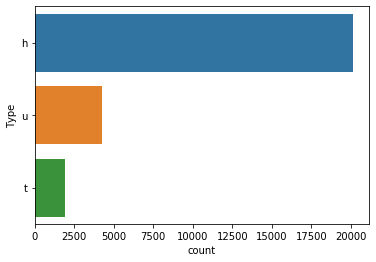

In [370]:
sns.countplot(y='Type', data=data)

#### Detailed exploration of different types of houses

In [371]:
house_data = data[data.Type=='h']
house_data.shape

(20154, 21)

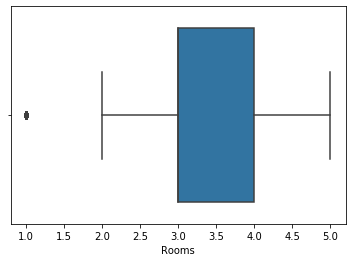

In [372]:
sns.boxplot(x='Rooms', data=house_data)

In [373]:
#looks like there is one bed room outlier here
len(house_data[house_data['Rooms']==1])

70

In [374]:
unit_data = data[data.Type=='u']
unit_data.shape

(4258, 21)

Text(0, 0.5, 'Count')

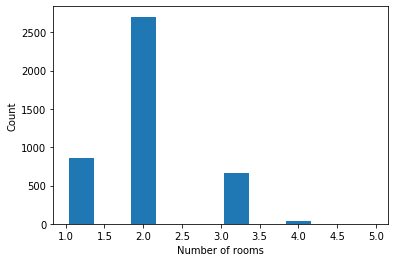

In [375]:
plt.hist(unit_data.Rooms, rwidth=0.8)
plt.xlabel("Number of rooms")
plt.ylabel("Count")

In [376]:
#out of 4258 unit houses, 32 of them have 4 bed
len(unit_data[unit_data['Rooms']==4])

32

In [377]:
t_data = data[data.Type=='t']
t_data.shape

(1939, 21)

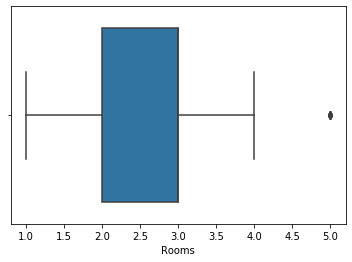

In [378]:
sns.boxplot(x='Rooms', data=t_data)

In [379]:
# out of 1939 unit houses, 11 of them have 5 bed
len(t_data[t_data['Rooms']==5])

11

#### Deleting house type outliers

In [380]:
data_cleaned = data.drop(data[(data['Type'] == 'h') & (data['Rooms'] == 1)].index)

In [381]:
data_cleaned = data_cleaned.drop(data_cleaned[(data_cleaned['Type']=='u') & (data_cleaned['Rooms']==4)].index)

In [382]:
data_cleaned = data_cleaned.drop(data_cleaned[(data_cleaned['Type']=='t') & (data_cleaned['Rooms']==5)].index)

### Before stat analysis, treat null and drop duplicate values

In [383]:
data_cleaned = data_cleaned.drop_duplicates()

In [384]:
data_cleaned.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             5721
Method               0
SellerG              0
Date                 0
Distance             0
Postcode             0
Bedroom2             0
Bathroom             0
Car                496
Landsize          3548
BuildingArea     12692
YearBuilt        10905
CouncilArea          0
Lattitude           26
Longtitude          26
Regionname           0
Propertycount        0
dtype: int64

In [385]:
data_cleaned.shape

(26237, 21)

In [386]:
#there is no price available for 5721 houses. Can either fill it with means or delete it. deleting it to make it simpler
data_cleaned = data_cleaned.dropna(subset=['Price'])

In [387]:
data_cleaned.shape

(20516, 21)

### Exploring number of cars

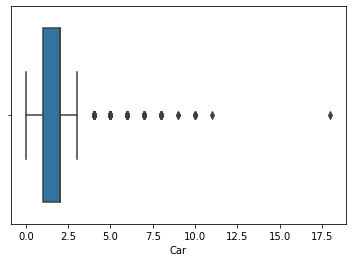

In [388]:
sns.boxplot(x='Car', data=data_cleaned)

In [389]:
data_cleaned['Car'].unique()

array([ 1.,  0.,  2.,  6.,  5.,  4.,  3.,  8.,  7.,  9., 10., nan, 18.,
       11.])

In [390]:
cars_rooms = data_cleaned[['Car', 'Rooms', 'Landsize']]

In [391]:
cars_rooms.describe()

,Car,Rooms,Landsize
count,20142.000000,20516.000000,17726.000000
mean,1.709364,3.041382,591.666930
std,0.985083,0.889450,3782.298846
min,0.000000,1.000000,0.000000
25%,1.000000,2.000000,218.000000
50%,2.000000,3.000000,511.000000
75%,2.000000,4.000000,662.000000
max,18.000000,5.000000,433014.000000


In [392]:
cars_rooms[cars_rooms['Landsize']>400000]

,Car,Rooms,Landsize
18036,1.0,3,433014.0


In [393]:
cars_rooms[cars_rooms['Car']>=10]

,Car,Rooms,Landsize
15449,10.0,4,993.0
18923,10.0,3,734.0
23395,10.0,4,1002.0
25839,18.0,2,1250.0
29910,10.0,5,980.0
30482,10.0,3,NaN
32862,11.0,4,697.0


In [394]:
data_cleaned = data_cleaned[data_cleaned['Car']<10]

In [395]:
data_cleaned = data_cleaned[data_cleaned['Landsize']<400000]

In [396]:
data_cleaned.shape

(17448, 21)

### Rooms vs landsize

In [397]:
rooms_landsize = data_cleaned[['Rooms', 'Landsize', 'Price', 'Type']]

In [398]:
rooms_landsize.describe()

,Rooms,Landsize,Price
count,17448.000000,17448.000000,1.744800e+04
mean,3.036165,567.787999,1.089249e+06
std,0.894382,1947.601953,6.471814e+05
min,1.000000,0.000000,8.500000e+04
25%,2.000000,222.000000,6.595000e+05
50%,3.000000,514.500000,9.100000e+05
75%,4.000000,662.000000,1.337000e+06
max,5.000000,146699.000000,1.120000e+07


In [399]:
rooms_landsize['rpl'] = rooms_landsize['Landsize']/rooms_landsize['Rooms']

In [400]:
rooms_landsize.head()

,Rooms,Landsize,Price,Type,rpl
1,2,202.0,1480000.0,h,101.000000
2,2,156.0,1035000.0,h,78.000000
4,3,134.0,1465000.0,h,44.666667
5,3,94.0,850000.0,h,31.333333
6,4,120.0,1600000.0,h,30.000000


In [401]:
rpl_h = rooms_landsize[rooms_landsize['Type'] =='h']

In [402]:
rpl_u = rooms_landsize[rooms_landsize['Type'] =='u']

In [403]:
rpl_t = rooms_landsize[rooms_landsize['Type'] =='t']

In [404]:
rpl_h.dropna()

,Rooms,Landsize,Price,Type,rpl
1,2,202.0,1480000.0,h,101.000000
2,2,156.0,1035000.0,h,78.000000
4,3,134.0,1465000.0,h,44.666667
5,3,94.0,850000.0,h,31.333333
6,4,120.0,1600000.0,h,30.000000
...,...,...,...,...,...
34848,4,375.0,621000.0,h,93.750000
34849,3,404.0,570000.0,h,134.666667
34852,4,593.0,1480000.0,h,148.250000
34853,2,98.0,888000.0,h,49.000000


In [405]:
rpl_h.describe()

,Rooms,Landsize,Price,rpl
count,13136.00000,13136.000000,1.313600e+04,13136.000000
mean,3.30268,615.827116,1.215603e+06,186.910020
std,0.77083,2073.996975,6.726770e+05,559.431402
min,2.00000,0.000000,1.310000e+05,0.000000
25%,3.00000,371.000000,7.600000e+05,115.500000
50%,3.00000,576.000000,1.037000e+06,163.633333
75%,4.00000,685.000000,1.470000e+06,207.541667
max,5.00000,146699.000000,1.120000e+07,36674.750000


In [406]:
rpl_h[rpl_h['rpl']>5000]

,Rooms,Landsize,Price,Type,rpl
1198,3,75100.0,2000000.0,h,25033.333333
8599,3,41400.0,572000.0,h,13800.000000
16539,4,38490.0,1070000.0,h,9622.500000
17293,3,76000.0,1085000.0,h,25333.333333
18531,4,40468.0,807000.0,h,10117.000000
20539,4,20200.0,780000.0,h,5050.000000
22632,5,44500.0,1355000.0,h,8900.000000
24413,3,21600.0,820000.0,h,7200.000000
24800,5,89030.0,1030000.0,h,17806.000000
25964,3,40468.0,930000.0,h,13489.333333


In [407]:
rpl_h['Price'].describe()

count    1.313600e+04
mean     1.215603e+06
std      6.726770e+05
min      1.310000e+05
25%      7.600000e+05
50%      1.037000e+06
75%      1.470000e+06
max      1.120000e+07
Name: Price, dtype: float64

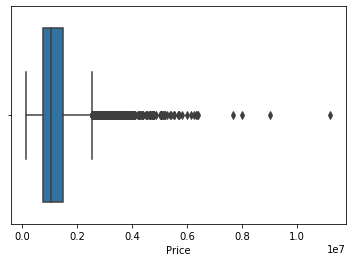

In [408]:
sns.boxplot(x='Price', data=rpl_h)

In [409]:
price_mean_h = rpl_h.Price.mean()

In [410]:
price_std_h = rpl_h.Price.std()

In [411]:
price_h_cutoff = price_std_h * 3
price_h_lower, price_h_upper = price_mean_h - price_h_cutoff, price_mean_h + price_h_cutoff

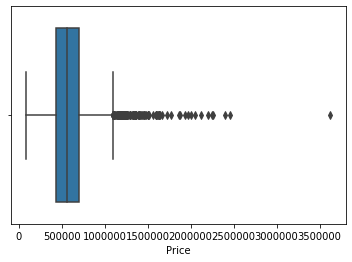

In [412]:
sns.boxplot(x='Price', data=rpl_u)

In [413]:
price_u_mean = rpl_u.Price.mean()
price_u_std = rpl_u.Price.std()
price_u_cutoff = price_u_std * 3
price_u_lower, price_u_upper = price_u_mean - price_u_cutoff, price_u_mean + price_u_cutoff

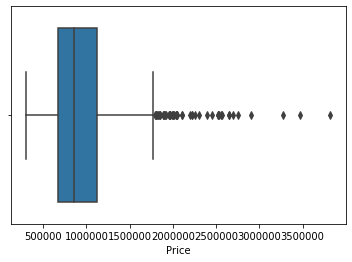

In [414]:
sns.boxplot(x='Price', data=rpl_t)

In [415]:
price_t_mean = rpl_t.Price.mean()
price_t_std = rpl_t.Price.std()
price_t_cutoff = price_t_std * 3
price_t_lower, price_t_upper = price_t_mean - price_t_cutoff, price_t_mean + price_t_cutoff

#### Removing price outliers accoridng to house type

In [416]:
data_cleaned = data_cleaned.drop(data_cleaned[(data_cleaned['Type']=='h') & (data_cleaned['Price']>price_h_upper)].index)
data_cleaned = data_cleaned.drop(data_cleaned[(data_cleaned['Type']=='h') & (data_cleaned['Price']<price_h_lower)].index)

In [417]:
data_cleaned = data_cleaned.drop(data_cleaned[(data_cleaned['Type']=='u') & (data_cleaned['Price']>price_u_upper)].index)
data_cleaned = data_cleaned.drop(data_cleaned[(data_cleaned['Type']=='u') & (data_cleaned['Price']<price_u_lower)].index)

In [418]:
data_cleaned = data_cleaned.drop(data_cleaned[(data_cleaned['Type']=='t') & (data_cleaned['Price']>price_t_upper)].index)
data_cleaned = data_cleaned.drop(data_cleaned[(data_cleaned['Type']=='t') & (data_cleaned['Price']<price_t_lower)].index)

In [419]:
data_cleaned.shape

(17157, 21)

### Sparse data detection and removal

In [420]:
#analyzing location stats
location_stats = data_cleaned.groupby('Suburb')['Suburb'].agg('count').sort_values(ascending = False)
location_stats

Suburb
Reservoir         427
Bentleigh East    297
Preston           284
Richmond          279
Brunswick         251
                 ... 
Wildwood            1
Whittlesea          1
Research            1
Monbulk             1
Eumemmerring        1
Name: Suburb, Length: 333, dtype: int64

In [421]:
len(location_stats[location_stats<=10])

96

In [422]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

Suburb
Chelsea Heights      10
Campbellfield        10
Chelsea              10
Caulfield East       10
Aspendale Gardens    10
                     ..
Wildwood              1
Whittlesea            1
Research              1
Monbulk               1
Eumemmerring          1
Name: Suburb, Length: 96, dtype: int64

In [423]:
data_cleaned.Suburb = data_cleaned.Suburb.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)

In [424]:
data_cleaned.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [425]:
data_cleaned.dropna()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.80720,144.99410,Northern Metropolitan,4019.0
11,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,2.0,0.0,245.0,210.0,1910.0,Yarra City Council,-37.80240,144.99930,Northern Metropolitan,4019.0
14,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,1.0,2.0,256.0,107.0,1890.0,Yarra City Council,-37.80600,144.99540,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34847,Wollert,27 Birchmore Rd,3,h,500000.0,PI,Ray,24/02/2018,25.5,3750.0,...,2.0,2.0,383.0,118.0,2016.0,Whittlesea City Council,-37.61940,145.03951,Northern Metropolitan,2940.0
34849,Wollert,35 Kingscote Wy,3,h,570000.0,SP,RW,24/02/2018,25.5,3750.0,...,2.0,2.0,404.0,158.0,2012.0,Whittlesea City Council,-37.61031,145.03393,Northern Metropolitan,2940.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0


## Final Dataset

In [426]:
final_df = data_cleaned[['Suburb', 'Rooms', 'Price','Bathroom', 'Type']]

In [427]:
final_df = pd.get_dummies(final_df,  drop_first=True)

In [428]:
final_df.head()

,Rooms,Price,Bathroom,Suburb_Aberfeldie,Suburb_Airport West,Suburb_Albert Park,Suburb_Albion,Suburb_Alphington,Suburb_Altona,Suburb_Altona Meadows,...,Suburb_Williamstown,Suburb_Williamstown North,Suburb_Windsor,Suburb_Wollert,Suburb_Wyndham Vale,Suburb_Yallambie,Suburb_Yarraville,Suburb_other,Type_t,Type_u
1,2,1480000.0,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1035000.0,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,1465000.0,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,3,850000.0,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,4,1600000.0,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [429]:
final_df = final_df.drop(columns = ['Suburb_other'])

In [430]:
final_df.shape

(17157, 241)

In [431]:
final_df.columns

Index(['Rooms', 'Price', 'Bathroom', 'Suburb_Aberfeldie',
       'Suburb_Airport West', 'Suburb_Albert Park', 'Suburb_Albion',
       'Suburb_Alphington', 'Suburb_Altona', 'Suburb_Altona Meadows',
       ...
       'Suburb_Wheelers Hill', 'Suburb_Williamstown',
       'Suburb_Williamstown North', 'Suburb_Windsor', 'Suburb_Wollert',
       'Suburb_Wyndham Vale', 'Suburb_Yallambie', 'Suburb_Yarraville',
       'Type_t', 'Type_u'],
      dtype='object', length=241)

In [432]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [433]:
X = final_df.drop(columns = ['Price'])

In [434]:
y = final_df['Price']

In [435]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [436]:
train_mean = X_train.mean()
train_std = X_train.std()

In [437]:
X_train = (X_train - train_mean) / train_std

In [438]:
X_test = (X_test - train_mean) / train_std

## Ridge Regression

In [439]:
tuned_params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
model = GridSearchCV(Ridge(), tuned_params, scoring = 'neg_mean_absolute_error', cv=10, n_jobs=-1)
model.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000, 100000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=0)

In [440]:
model.best_estimator_

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [441]:
y_train_pred = model.predict(X_train)

In [442]:
y_pred = model.predict(X_test)

In [443]:
from sklearn.metrics import r2_score
print("Train Results for Ridge Regression:")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))
print("Mean Absolute Error: ", mae(y_train.values, y_train_pred))

Train Results for Ridge Regression:
Root mean squared error:  285522.84263196896
R-squared:  0.7214828219173006
Mean Absolute Error:  205419.4026360742


## XGBoost

In [444]:
tuned_params = {'max_depth': [1, 2, 3, 4, 5], 'learning_rate': [0.01, 0.05, 0.1], 'n_estimators': [100, 200, 300, 400, 500], 'reg_lambda': [0.001, 0.1, 1.0, 10.0, 100.0]}
model = RandomizedSearchCV(XGBRegressor(), tuned_params, n_iter=20, scoring = 'neg_mean_absolute_error', cv=5, n_jobs=-1)
model.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_con...
                                          tree_method=None,
                                          validate_parameters=None,
                                          verbosity=None),
                   iid='warn', n_iter=20, n_jo

In [445]:
model.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=400, n_jobs=8, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=0.001, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [446]:
y_train_pred = model.predict(X_train)

In [447]:
y_pred = model.predict(X_test)

In [448]:
print("Train Results for XGBoost Regression:")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", rs(y_train.values, y_train_pred))
print("Mean Absolute Error: ", mae(y_train.values, y_train_pred))

Train Results for XGBoost Regression:
Root mean squared error:  263722.4470032901
R-squared:  0.7623901378590101
Mean Absolute Error:  187667.5530448021


## LASSO Regression

In [449]:
tuned_params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
model = GridSearchCV(Lasso(), tuned_params, scoring = 'neg_mean_absolute_error', cv=20, n_jobs=-1)
model.fit(X_train, y_train)

GridSearchCV(cv=20, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000, 100000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=0)

In [450]:
model.best_estimator_

Lasso(alpha=10, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [451]:
y_train_pred = model.predict(X_train)

In [452]:
y_pred = model.predict(X_test)

In [453]:
print("Train Results for Lasso Regression:")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", rs(y_train.values, y_train_pred))
print("Mean Absolute Error: ", mae(y_train.values, y_train_pred))

Train Results for Lasso Regression:
Root mean squared error:  285224.3355838682
R-squared:  0.7220648830921603
Mean Absolute Error:  205426.22434895815


## KN Regression

In [454]:
# creating odd list of K for KNN
neighbors = list(range(1,50,2))
# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='neg_mean_absolute_error')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)


The optimal number of neighbors is 7.


In [455]:
model = KNeighborsRegressor(n_neighbors = optimal_k)
model.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                    weights='uniform')

In [456]:
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)

In [457]:
print("Train Results for KN Regression:")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", rs(y_train.values, y_train_pred))
print("Mean Absolute Error: ", mae(y_train.values, y_train_pred))

Train Results for KN Regression:
Root mean squared error:  256774.84610684027
R-squared:  0.7747445932778865
Mean Absolute Error:  175340.30067731312


## Best performing model - K Nearest Neighbors Regression 

In [458]:
#saving the best performing model
best_model = KNeighborsRegressor(n_neighbors = optimal_k)
best_model.fit(X_train, y_train)
with open('melbourne_housing.pkl', 'wb') as pickle_file:
       joblib.dump(best_model, 'melbourne_housing.pkl')

Note: I have also implemented other models, since the score was extremely low, its not inluded in this file 